In [1]:
import numpy as np
import pygimli as pg
import pybert as pb
from pygimli.physics import ert
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
import pandas as pd
import pickle
from datetime import datetime
from glob import glob
from scipy.interpolate import interp1d

In [2]:
dir = "//smb.isipd.dmawi.de/projects/p_thinice/06_data/ERT_data/"

In [3]:
e02_v1_1 = ert.load(dir + 'raw_data/parsons_e02_v1_01.txt')
e02_h1_1 = ert.load(dir + 'raw_data/parsons_e02_h1_01.txt')
e02_h1_2 = ert.load(dir + 'raw_data/parsons_e02_h1_02.txt')

e02_v1_topo = pd.read_csv(dir + 'topo_data/parsons_e02_v1_topo.txt', sep='\s+', header=None)
e02_h1_topo = pd.read_csv(dir + 'topo_data/parsons_e02_h1_topo.txt', sep='\s+', header=None)

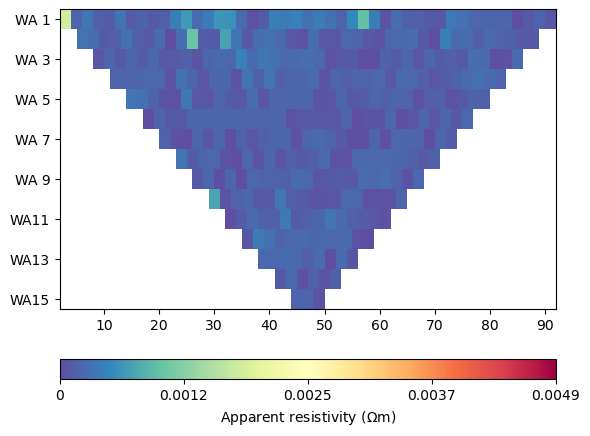

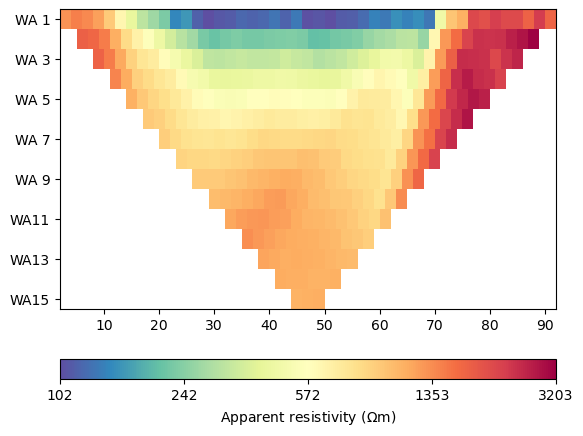

In [4]:
ert.show(e02_v1_1, e02_v1_1['err'])
ert.showData(e02_v1_1)
e02_v1_1['err'] = e02_v1_1['err'] + 0.02

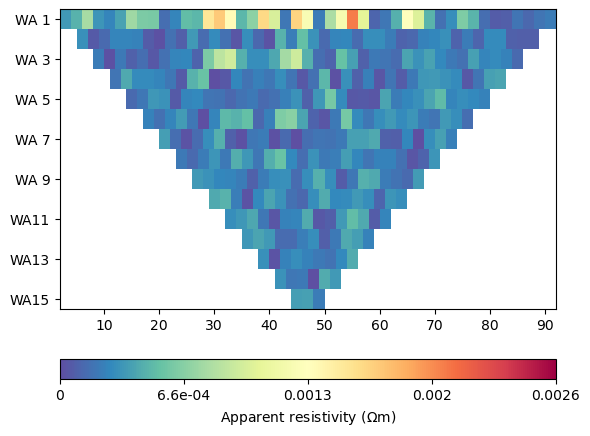

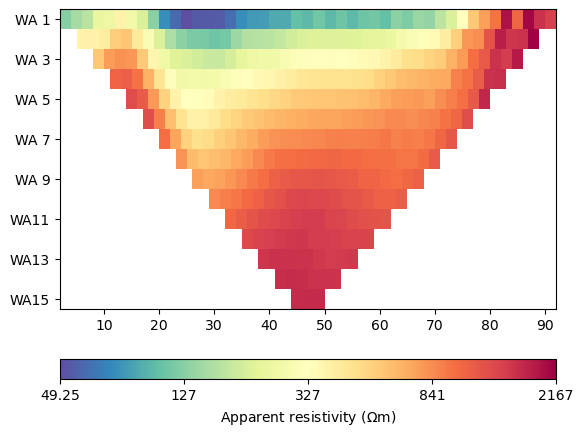

In [5]:
ert.show(e02_h1_1, e02_h1_1['err'])
ert.showData(e02_h1_1)
e02_h1_1['err'] = e02_h1_1['err'] + 0.02

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2ca77abdb90>)

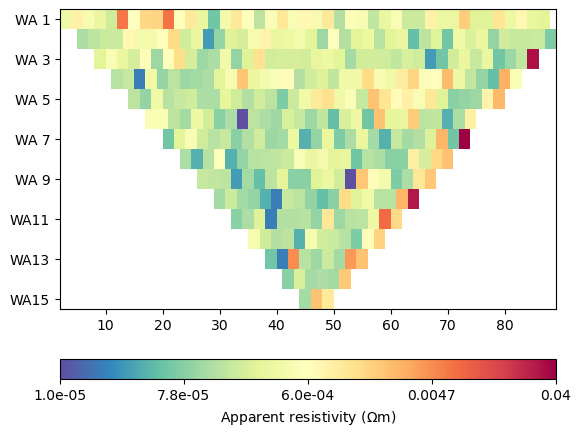

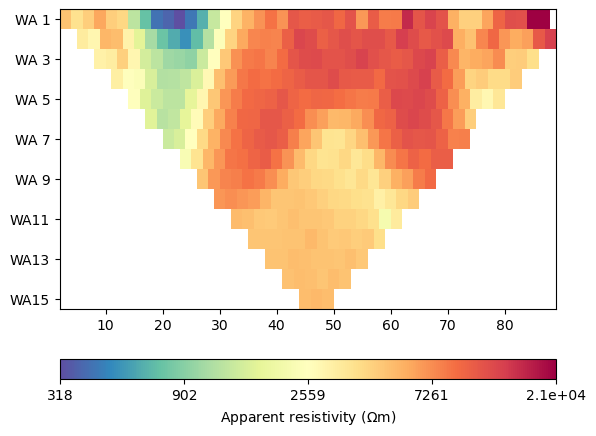

In [6]:
ert.show(e02_h1_2, e02_h1_2['err'])
ert.showData(e02_h1_2)
#e02_h1_2['err'] = e02_h1_2['err'] - 0.02

In [7]:
h1 = [e02_h1_1, e02_h1_2]

In [8]:

e02_v1_1["k0"] = ert.createGeometricFactors(e02_v1_1)
e02_v1_1["r"] = e02_v1_1["rhoa"]/e02_v1_1["k0"]

for data in h1:
    data["k0"] = ert.createGeometricFactors(data)
    data["r"] = data["rhoa"]/data["k0"]

23/07/25 - 13:01:05 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 3): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\4333741774393615926
23/07/25 - 13:01:05 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 3): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\4797247423026872608
23/07/25 - 13:01:05 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 2): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\3152962109180437207


In [9]:
for i in range(e02_v1_1.sensorCount()):
    x_new = e02_v1_topo[0][i]  
    y_new = e02_v1_topo[1][i]  
    e02_v1_1.setSensorPosition(i, [x_new, y_new])

for data in h1:
    for i in range(data.sensorCount()):
        x_new = e02_h1_topo[0][i]  # Get x-value from diag1_topo[0]
        y_new = e02_h1_topo[1][i]  # Get y-value from diag1_topo[1]
        data.setSensorPosition(i, [x_new, y_new])

In [10]:
e02_v1_1["k"] = ert.createGeometricFactors(e02_v1_1, numerical=True)
e02_v1_1["rhoa"] = e02_v1_1["r"]*e02_v1_1["k"]

for data in h1:
    data["k"] = ert.createGeometricFactors(data, numerical=True)
    data["rhoa"] = data["r"]*data["k"]

23/07/25 - 13:01:12 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (6.5s x 3): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\6423317312325737310
23/07/25 - 13:01:12 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (5.7s x 3): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\2629110216933286997
23/07/25 - 13:01:12 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (6.6s x 2): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\5640724491111431218


In [11]:
v1_struct = pd.read_csv(dir + "inversions/parsons_v1_pandas_struct.txt", header=None, sep="\s+")
h1_struct = pd.read_csv(dir + "inversions/parsons_h1_pandas_veg_struct.txt", header=None, sep="\s+")

In [12]:
interpolated_topography_v1 = interp1d(e02_v1_topo[0], e02_v1_topo[1], kind='quadratic', fill_value='extrapolate')
interpolated_topography_h1 = interp1d(e02_h1_topo[0], e02_h1_topo[1], kind='quadratic', fill_value='extrapolate')

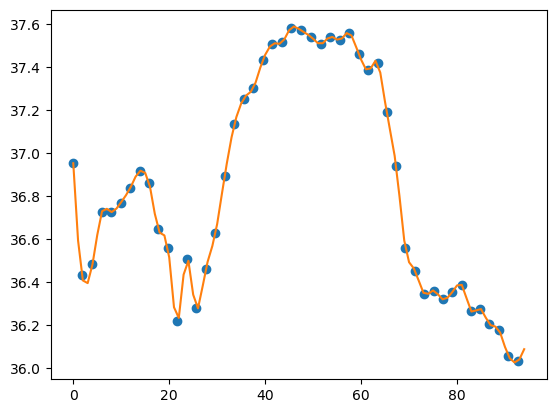

In [23]:
xnew = np.arange(0, 95, 1)

ynew_v1 = interpolated_topography_v1(xnew)
ynew_h1 = interpolated_topography_h1(xnew)
#plt.plot(e02_v1_topo[0], e02_v1_topo[1], 'o', xnew, ynew_v1, '-')
plt.plot(e02_h1_topo[0], e02_h1_topo[1], 'o', xnew, ynew_h1, '-')

In [14]:
xnew_struct_v1 = np.arange(0, 94, 1)
interpolated_struct_v1 = interp1d(v1_struct[0], v1_struct[1], kind='linear', fill_value='extrapolate')
ynew_struct_v1 = interpolated_struct_v1(xnew_struct_v1)

In [15]:
xnew_struct_h1 = np.arange(0, 63, 1)
interpolated_struct_h1 = interp1d(h1_struct[0], h1_struct[1], kind='linear', fill_value='extrapolate')
ynew_struct_h1 = interpolated_struct_h1(xnew_struct_h1)

23/07/25 - 13:02:42 - pyGIMLi - INFO - Found 2 regions.
23/07/25 - 13:02:42 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/07/25 - 13:02:42 - pyGIMLi - INFO - Found 2 regions.
23/07/25 - 13:02:42 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/07/25 - 13:02:42 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/07/25 - 13:02:42 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
23/07/25 - 13:02:42 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2271 Cells: 4272 Boundaries: 3338
23/07/25 - 13:02:42 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:02:42 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:02:42 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  240.67 (dPhi = 87.62%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   47.82 (dPhi = 53.26%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   49.52 (dPhi = 8.87%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   32.92 (dPhi = 4.23%) lam:

23/07/25 - 13:03:13 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:03:13 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:03:13 - pyGIMLi - INFO - Starting inversion.


chi² =   35.61 (dPhi = 0.24%) lam: 1000.0
################################################################################
#                Abort criterion reached: dPhi = 0.24 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  238.70 (dPhi = 87.91%) lam: 853.2
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   47.81 (dPhi = 55.5

23/07/25 - 13:03:41 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:03:41 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:03:41 - pyGIMLi - INFO - Starting inversion.


chi² =   30.54 (dPhi = 0.31%) lam: 853.2
################################################################################
#                Abort criterion reached: dPhi = 0.31 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  232.55 (dPhi = 88.39%) lam: 727.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   49.90 (dPhi = 56.18

23/07/25 - 13:04:13 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:04:13 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:04:13 - pyGIMLi - INFO - Starting inversion.


chi² =   28.24 (dPhi = 0.47%) lam: 727.9
################################################################################
#                Abort criterion reached: dPhi = 0.47 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  230.65 (dPhi = 88.63%) lam: 621.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   51.33 (dPhi = 57.69

23/07/25 - 13:04:42 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:04:42 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:04:42 - pyGIMLi - INFO - Starting inversion.


chi² =   24.55 (dPhi = 0.73%) lam: 621.0
################################################################################
#                Abort criterion reached: dPhi = 0.73 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  228.97 (dPhi = 88.84%) lam: 529.8
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   53.30 (dPhi = 58.86

23/07/25 - 13:05:15 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:05:15 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:05:15 - pyGIMLi - INFO - Starting inversion.


chi² =   22.03 (dPhi = 0.14%) lam: 529.8
################################################################################
#                Abort criterion reached: dPhi = 0.14 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  223.14 (dPhi = 89.24%) lam: 452.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   57.36 (dPhi = 58.32

23/07/25 - 13:05:48 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:05:48 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:05:48 - pyGIMLi - INFO - Starting inversion.


chi² =   19.60 (dPhi = 0.89%) lam: 452.0
################################################################################
#                Abort criterion reached: dPhi = 0.89 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  221.69 (dPhi = 89.41%) lam: 385.7
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   60.32 (dPhi = 58.73

23/07/25 - 13:06:22 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:06:22 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:06:22 - pyGIMLi - INFO - Starting inversion.


chi² =   17.78 (dPhi = 0.78%) lam: 385.7
################################################################################
#                Abort criterion reached: dPhi = 0.78 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  220.49 (dPhi = 89.56%) lam: 329.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   63.73 (dPhi = 58.79

23/07/25 - 13:06:52 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:06:52 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:06:52 - pyGIMLi - INFO - Starting inversion.


chi² =   15.88 (dPhi = 0.63%) lam: 329.0
################################################################################
#                Abort criterion reached: dPhi = 0.63 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  219.59 (dPhi = 89.68%) lam: 280.7
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   67.57 (dPhi = 58.53

23/07/25 - 13:07:27 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:07:27 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:07:27 - pyGIMLi - INFO - Starting inversion.


chi² =   14.25 (dPhi = 1.16%) lam: 280.7
################################################################################
#                Abort criterion reached: dPhi = 1.16 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  214.43 (dPhi = 89.99%) lam: 239.5
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   73.41 (dPhi = 56.42

23/07/25 - 13:08:04 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:08:04 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:08:04 - pyGIMLi - INFO - Starting inversion.


chi² =   12.52 (dPhi = 0.43%) lam: 239.5
################################################################################
#                Abort criterion reached: dPhi = 0.43 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  213.85 (dPhi = 90.08%) lam: 204.3
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   78.04 (dPhi = 55.46

23/07/25 - 13:08:52 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:08:52 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:08:52 - pyGIMLi - INFO - Starting inversion.


chi² =   12.43 (dPhi = 22.18%) lam: 204.3
--------------------------------------------------------------------------------
inv.iter 5 ... chi² =   11.36 (dPhi = 1.36%) lam: 204.3
################################################################################
#                Abort criterion reached: dPhi = 1.36 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  213.61 (dPhi = 90.14

23/07/25 - 13:09:18 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:09:18 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:09:18 - pyGIMLi - INFO - Starting inversion.


chi² =  116.09 (dPhi = -36.81%) lam: 174.3
################################################################################
#               Abort criterion reached: dPhi = -36.81 (< 2.0%)                #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  209.28 (dPhi = 90.39%) lam: 148.7
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   89.76 (dPhi = 51.

23/07/25 - 13:09:55 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:09:55 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:09:55 - pyGIMLi - INFO - Starting inversion.


chi² =    9.02 (dPhi = 0.14%) lam: 148.7
################################################################################
#                Abort criterion reached: dPhi = 0.14 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  209.44 (dPhi = 90.43%) lam: 126.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   95.27 (dPhi = 49.53

23/07/25 - 13:10:31 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:10:31 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:10:31 - pyGIMLi - INFO - Starting inversion.


chi² =    8.24 (dPhi = 1.73%) lam: 126.9
################################################################################
#                Abort criterion reached: dPhi = 1.73 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  209.93 (dPhi = 90.44%) lam: 108.3
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  101.02 (dPhi = 47.70

23/07/25 - 13:11:28 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:11:28 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:11:28 - pyGIMLi - INFO - Starting inversion.


chi² =    7.34 (dPhi = 1.28%) lam: 108.3
################################################################################
#                Abort criterion reached: dPhi = 1.28 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  206.54 (dPhi = 90.63%) lam: 92.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  108.05 (dPhi = 44.17%

23/07/25 - 13:12:19 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:12:19 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:12:19 - pyGIMLi - INFO - Starting inversion.


chi² =    6.57 (dPhi = 2.38%) lam: 92.4
--------------------------------------------------------------------------------
inv.iter 7 ... chi² =    6.58 (dPhi = 0.01%) lam: 92.4
################################################################################
#                Abort criterion reached: dPhi = 0.01 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  207.50 (dPhi = 90.62%) 

23/07/25 - 13:12:58 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:12:58 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:12:58 - pyGIMLi - INFO - Starting inversion.


chi² =    5.90 (dPhi = 3.48%) lam: 78.8
--------------------------------------------------------------------------------
inv.iter 7 ... chi² =    5.91 (dPhi = 0.00%) lam: 78.8
################################################################################
#                 Abort criterion reached: dPhi = 0.0 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  208.81 (dPhi = 90.59%) 

23/07/25 - 13:13:46 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:13:46 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:13:46 - pyGIMLi - INFO - Starting inversion.


chi² =    5.32 (dPhi = 0.00%) lam: 67.2
################################################################################
#                 Abort criterion reached: dPhi = 0.0 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  206.48 (dPhi = 90.72%) lam: 57.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  126.74 (dPhi = 36.65%)

23/07/25 - 13:14:20 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:14:20 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:14:20 - pyGIMLi - INFO - Starting inversion.


chi² =    4.85 (dPhi = 0.06%) lam: 57.4
################################################################################
#                Abort criterion reached: dPhi = 0.06 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  208.24 (dPhi = 90.66%) lam: 48.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  132.71 (dPhi = 34.67%)

23/07/25 - 13:14:51 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:14:51 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:14:51 - pyGIMLi - INFO - Starting inversion.


chi² =    4.38 (dPhi = 5.38%) lam: 48.9
--------------------------------------------------------------------------------
inv.iter 7 ... chi² =    4.44 (dPhi = 0.14%) lam: 48.9
################################################################################
#                Abort criterion reached: dPhi = 0.14 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  210.33 (dPhi = 90.59%) 

23/07/25 - 13:15:25 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:15:25 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:15:25 - pyGIMLi - INFO - Starting inversion.


chi² =    4.04 (dPhi = 0.16%) lam: 41.8
################################################################################
#                Abort criterion reached: dPhi = 0.16 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  212.75 (dPhi = 90.50%) lam: 35.6
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  144.68 (dPhi = 30.96%)

23/07/25 - 13:16:00 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:16:00 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:16:00 - pyGIMLi - INFO - Starting inversion.


chi² =    3.62 (dPhi = 3.68%) lam: 35.6
--------------------------------------------------------------------------------
inv.iter 7 ... chi² =    3.63 (dPhi = 0.01%) lam: 35.6
################################################################################
#                Abort criterion reached: dPhi = 0.01 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  211.55 (dPhi = 90.57%) 

23/07/25 - 13:16:26 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:16:26 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:16:26 - pyGIMLi - INFO - Starting inversion.


chi² =    3.36 (dPhi = 0.80%) lam: 30.4
################################################################################
#                 Abort criterion reached: dPhi = 0.8 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  214.49 (dPhi = 90.46%) lam: 25.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  134.70 (dPhi = 36.52%)

23/07/25 - 13:16:56 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:16:56 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:16:56 - pyGIMLi - INFO - Starting inversion.


chi² =    3.12 (dPhi = 1.18%) lam: 25.9
################################################################################
#                Abort criterion reached: dPhi = 1.18 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  217.78 (dPhi = 90.33%) lam: 22.1
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  132.34 (dPhi = 38.68%)

23/07/25 - 13:17:24 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:17:24 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:17:24 - pyGIMLi - INFO - Starting inversion.


chi² =    2.85 (dPhi = 1.48%) lam: 22.1
################################################################################
#                Abort criterion reached: dPhi = 1.48 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  217.76 (dPhi = 90.35%) lam: 18.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  123.07 (dPhi = 43.01%)

23/07/25 - 13:17:59 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:17:59 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:17:59 - pyGIMLi - INFO - Starting inversion.


chi² =    2.40 (dPhi = 1.47%) lam: 18.9
################################################################################
#                Abort criterion reached: dPhi = 1.47 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  221.17 (dPhi = 90.21%) lam: 16.1
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  118.84 (dPhi = 45.87%)

23/07/25 - 13:18:34 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:18:34 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:18:34 - pyGIMLi - INFO - Starting inversion.


chi² =    2.17 (dPhi = 1.00%) lam: 16.1
################################################################################
#                 Abort criterion reached: dPhi = 1.0 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  224.93 (dPhi = 90.05%) lam: 13.7
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  121.42 (dPhi = 45.72%)

23/07/25 - 13:19:07 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:19:07 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:19:07 - pyGIMLi - INFO - Starting inversion.


chi² =    2.11 (dPhi = 24.88%) lam: 13.7
--------------------------------------------------------------------------------
inv.iter 7 ... chi² =    1.99 (dPhi = 0.86%) lam: 13.7
################################################################################
#                Abort criterion reached: dPhi = 0.86 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  228.85 (dPhi = 89.89%)

23/07/25 - 13:19:40 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:19:40 - pyGIMLi - INFO - Created startmodel from forward operator:783, min/max=651.421790/651.421790
23/07/25 - 13:19:40 - pyGIMLi - INFO - Starting inversion.


chi² =    1.79 (dPhi = 0.40%) lam: 11.7
################################################################################
#                 Abort criterion reached: dPhi = 0.4 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA76551B70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  229.46 (dPhi = 89.87%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  122.70 (dPhi = 46.29%)

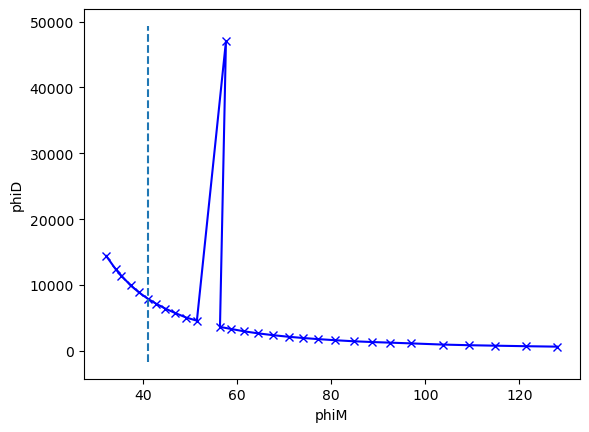

In [16]:
mgr = ert.Manager(e02_h1_1)
lambdas = np.logspace(np.log10(1000), np.log10(10), num=30)
phiD = []
phiM = []

for lam in lambdas:
    mgr.invert(e02_h1_1, zWeight=0.5, lam=lam, verbose=True)
    phiD.append(mgr.inv.phiData())
    phiM.append(mgr.inv.phiModel())

phiD = np.array(phiD)
phiM = np.array(phiM)

from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(phiM, phiD, S=1.0, curve="convex", direction="decreasing",interp_method='interp1d')

print(round(kneedle.elbow, 3))
print(round(kneedle.knee_y, 3))
print(lambdas[np.where(phiM==kneedle.knee)[0]])

plt.xlabel('phiM')
plt.ylabel('phiD')
plt.plot(phiM, phiD, 'bx-')
plt.vlines(kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

92.453
1265.013
[25.92943797]


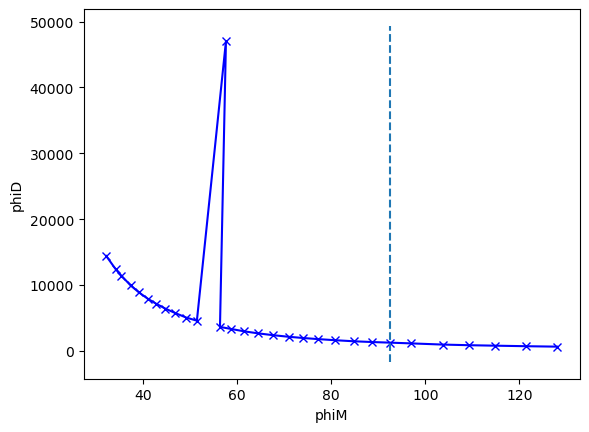

In [17]:
from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(phiM, phiD, online=True, curve="convex", direction="decreasing",interp_method='polynomial', polynomial_degree=3)

print(round(kneedle.elbow, 3))
print(round(kneedle.elbow_y, 3))
print(lambdas[np.where(phiM==kneedle.elbow)[0]])

plt.xlabel('phiM')
plt.ylabel('phiD')
plt.plot(phiM, phiD, 'bx-')
plt.vlines(kneedle.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [18]:
lambdas

array([1000.        ,  853.16785242,  727.8953844 ,  621.01694189,
        529.83169063,  452.03536564,  385.66204212,  329.03445623,
        280.72162039,  239.502662  ,  204.33597179,  174.33288222,
        148.73521073,  126.89610032,  108.26367339,   92.36708572,
         78.80462816,   67.23357536,   57.3615251 ,   48.93900918,
         41.75318937,   35.6224789 ,   30.39195382,   25.92943797,
         22.12216291,   18.87391822,   16.10262028,   13.73823796,
         11.72102298,   10.        ])

23/07/25 - 13:45:10 - pyGIMLi - INFO - Found 2 regions.
23/07/25 - 13:45:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/07/25 - 13:45:10 - pyGIMLi - INFO - Found 2 regions.
23/07/25 - 13:45:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
23/07/25 - 13:45:10 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/07/25 - 13:45:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
23/07/25 - 13:45:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4535 Cells: 8784 Boundaries: 6730
23/07/25 - 13:45:10 - pyGIMLi - INFO - Use median(data values)=651.421789706087
23/07/25 - 13:45:10 - pyGIMLi - INFO - Created startmodel from forward operator:1592, min/max=651.421790/651.421790
23/07/25 - 13:45:10 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CA0AE3AA70>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.75
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  215.03 (dPhi = 90.44%) lam: 25.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  135.47 (dPhi = 36.37%) lam: 25.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   12.40 (dPhi = 87.11%) lam: 25.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    6.24 (dPhi = 34.78%) lam: 25.

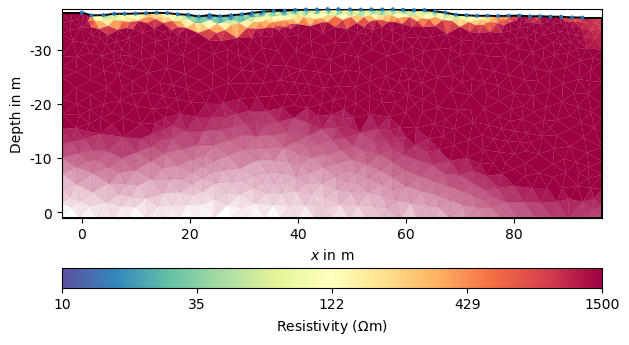

In [20]:
mgr = ert.Manager(e02_h1_1)
mgr.invert(zWeight=0.5, verbose=True, paraMaxCellSize=5.0, lam=25)
ax, cb = mgr.showResult(cMin=10, cMax=1500)
#ax.plot(xnew_struct_v1, ynew_v1[:94] - ynew_struct_v1, "k-")

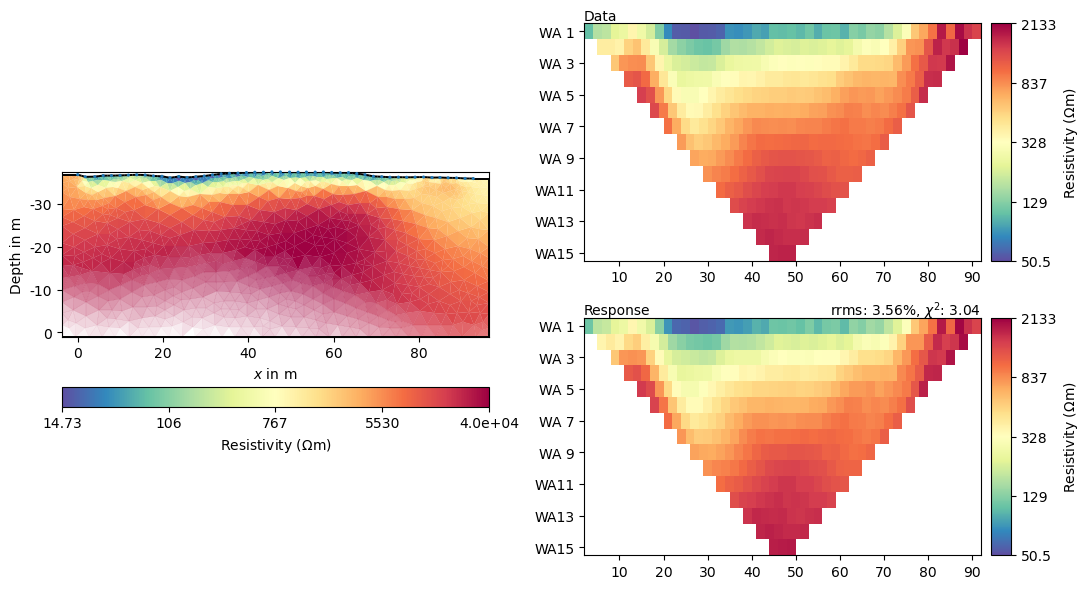

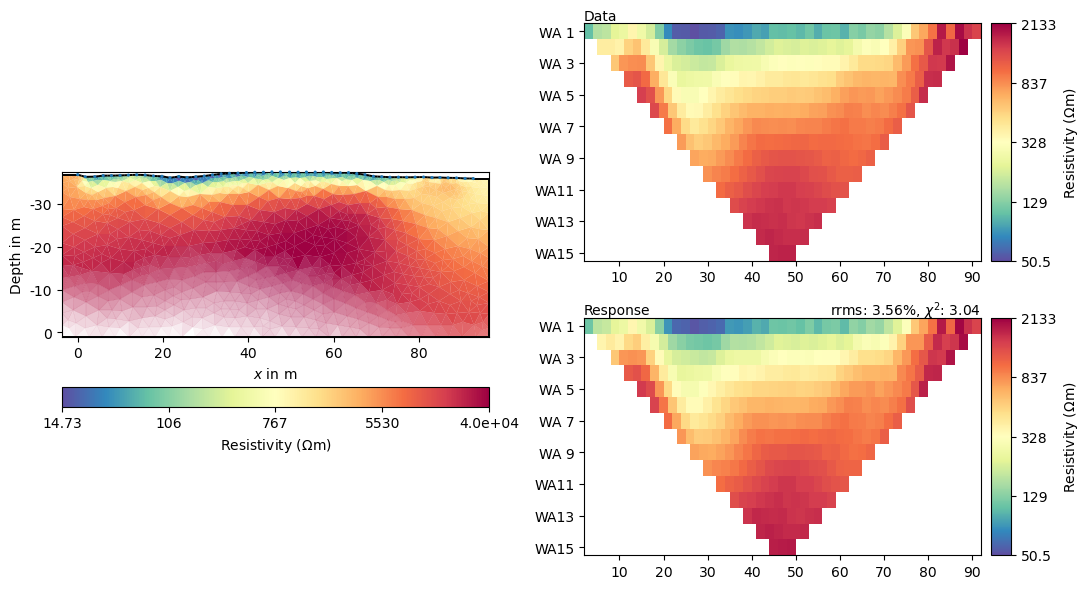

In [21]:
mgr.showResultAndFit()

23/07/25 - 14:57:55 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_thinice/06_data/ERT_data/inversions/saved/e02_h1_1\ERTManager


('//smb.isipd.dmawi.de/projects/p_thinice/06_data/ERT_data/inversions/saved/e02_h1_1\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

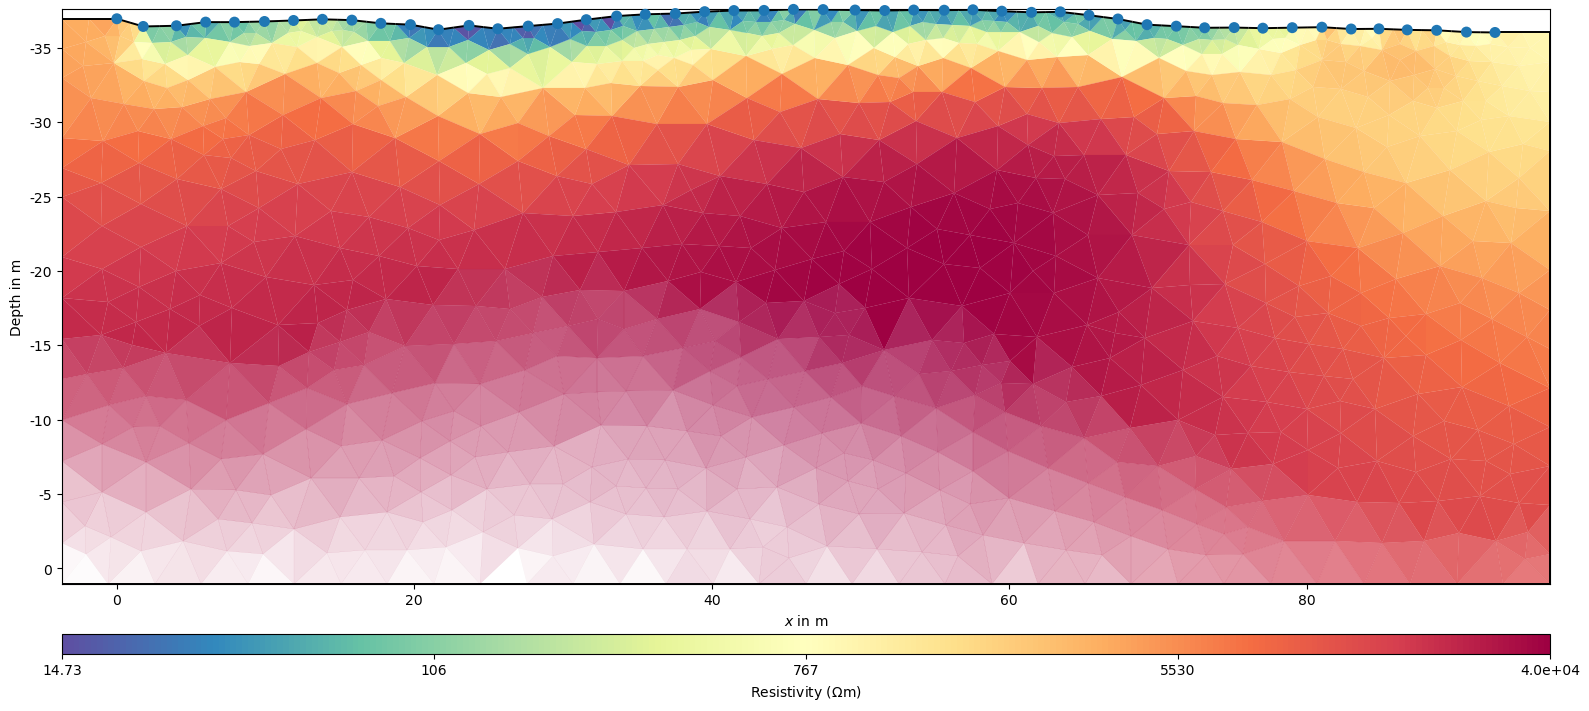

In [22]:
mgr.saveResult(dir + 'inversions/saved/e02_h1_1')

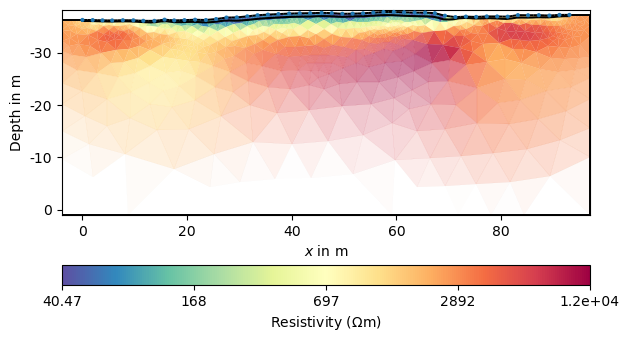

In [59]:
ax, cb = mgr.showResult()
ax.plot(xnew_struct_v1, ynew_v1[:94] - ynew_struct_v1, "k-")

In [60]:
struct_v1_new = np.column_stack((xnew_struct_v1, ynew_v1[:94] - ynew_struct_v1))

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x185507ef590>)

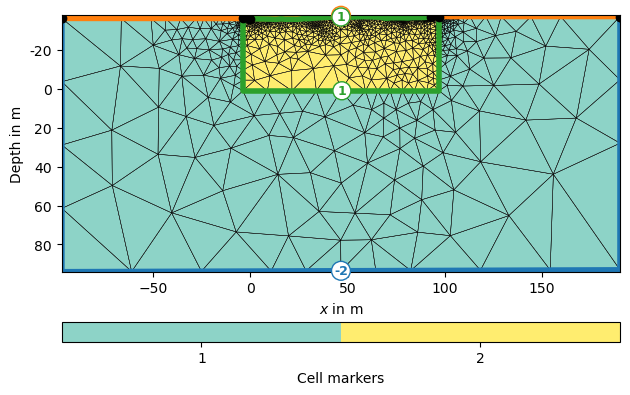

In [61]:
plc = mt.createParaMeshPLC(e02_v1_1, boundary=1)
line = mt.createPolygon(struct_v1_new, marker=1)
plc += line
mesh = mt.createMesh(plc, quality=34.3)
pg.show(mesh, markers=True, showMesh=True)

17/07/25 - 15:35:39 - pyGIMLi - INFO - Found 2 regions.
17/07/25 - 15:35:39 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


17/07/25 - 15:35:39 - pyGIMLi - INFO - Creating forward mesh from region infos.
17/07/25 - 15:35:39 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
17/07/25 - 15:35:39 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5538 Cells: 10652 Boundaries: 8200
17/07/25 - 15:35:39 - pyGIMLi - INFO - Use median(data values)=812.9571159076055
17/07/25 - 15:35:39 - pyGIMLi - INFO - Created startmodel from forward operator:2214, min/max=812.957116/812.957116
17/07/25 - 15:35:39 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001855327DC60>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 103/2965
min/max (error): 2%/2.49%
min/max (start model): 813/813
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 1837.22
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1259.97 (dPhi = 31.42%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  155.29 (dPhi = 87.60%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   59.84 (dPhi = 61.11%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   23.84 (dPhi = 59.44%) lam: 20.0
-----------------------------------------------------

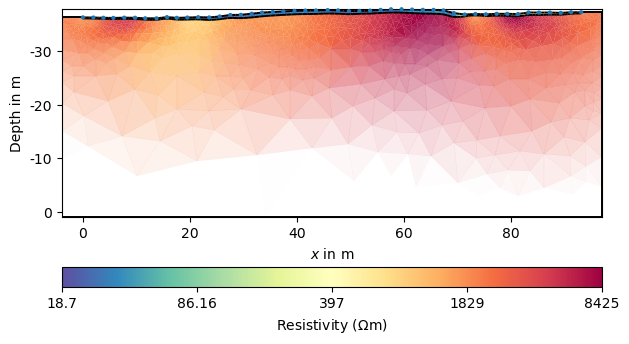

In [62]:
mgr = ert.Manager(e02_v1_1)
mgr.setMesh(mesh)
mgr.invert(verbose=True)
ax, cb = mgr.showResult()

(30.0, 37.7981)

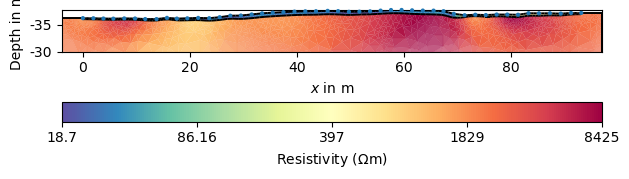

In [64]:
ax, cb = mgr.showResult()
ax.set_ylim(30)

17/07/25 - 15:08:35 - pyGIMLi - INFO - Found 2 regions.
17/07/25 - 15:08:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
17/07/25 - 15:08:35 - pyGIMLi - INFO - Found 2 regions.
17/07/25 - 15:08:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
17/07/25 - 15:08:35 - pyGIMLi - INFO - Creating forward mesh from region infos.
17/07/25 - 15:08:35 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
17/07/25 - 15:08:35 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3621 Cells: 6928 Boundaries: 5352
17/07/25 - 15:08:36 - pyGIMLi - INFO - Use median(data values)=651.421789706087
17/07/25 - 15:08:36 - pyGIMLi - INFO - Created startmodel from forward operator:1150, min/max=651.421790/651.421790
17/07/25 - 15:08:36 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001855339BD80>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.73
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  217.87 (dPhi = 90.33%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  139.33 (dPhi = 35.52%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   11.39 (dPhi = 88.65%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    6.69 (dPhi = 29.44%) lam: 20.

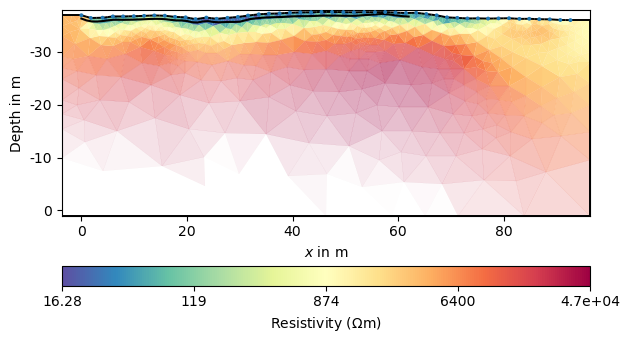

In [46]:
mgr = ert.Manager(e02_h1_1)
mgr.invert(zWeight=0.5, verbose=True, quality=34.3)
ax, cb = mgr.showResult()
ax.plot(xnew_struct_h1, ynew_h1[:63] - ynew_struct_h1, "k-")

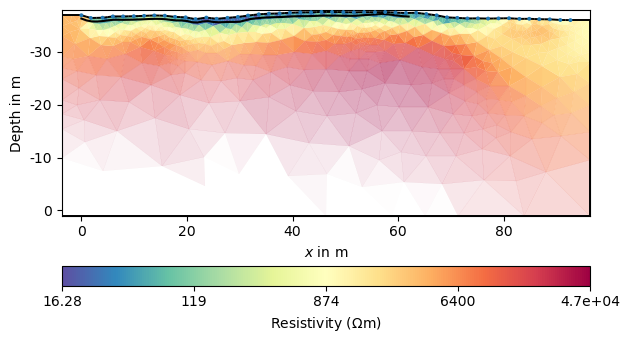

In [48]:
ax, cb = mgr.showResult()
ax.plot(xnew_struct_h1, ynew_h1[:63] - ynew_struct_h1, "k-")

In [49]:
struct_h1_new = np.column_stack((xnew_struct_h1, ynew_h1[:63] - ynew_struct_h1))

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x1859030e350>)

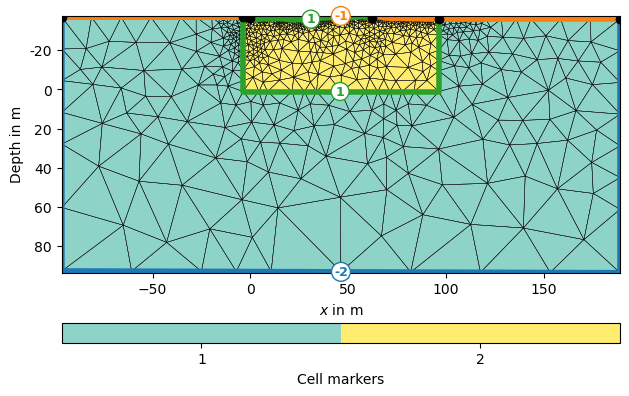

In [50]:
plc = mt.createParaMeshPLC(e02_h1_1, boundary=1)
line = mt.createPolygon(struct_h1_new, marker=1)
plc += line
mesh = mt.createMesh(plc, quality=34.3)
pg.show(mesh, markers=True, showMesh=True)

17/07/25 - 15:14:39 - pyGIMLi - INFO - Found 2 regions.
17/07/25 - 15:14:39 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
17/07/25 - 15:14:39 - pyGIMLi - INFO - Creating forward mesh from region infos.


17/07/25 - 15:14:39 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
17/07/25 - 15:14:40 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3411 Cells: 6512 Boundaries: 5038
17/07/25 - 15:14:40 - pyGIMLi - INFO - Use median(data values)=651.421789706087
17/07/25 - 15:14:40 - pyGIMLi - INFO - Created startmodel from forward operator:1179, min/max=651.421790/651.421790
17/07/25 - 15:14:40 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000185534E7B50>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 50.5/2133
min/max (error): 2%/2.27%
min/max (start model): 651/651
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2283.37
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  398.63 (dPhi = 82.47%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  174.35 (dPhi = 55.98%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   75.51 (dPhi = 55.83%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   39.63 (dPhi = 45.72%) lam: 20.0
----------------------------------------------------

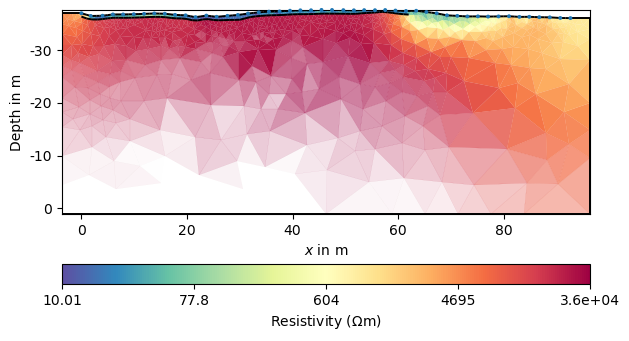

In [51]:
mgr = ert.Manager(e02_h1_1)
mgr.setMesh(mesh)
mgr.invert(verbose=True)
ax, cb = mgr.showResult()